In [26]:
import pandas as pd

# 1. Verileri tanımlayalım
data = {
    'Motor_Ağırlığı': [75, 85, 65],
    'Yakıt_Hücresi_Ağırlığı': [85, 90, 80],
    'Şasi_Ağırlığı': [120, 130, 110],
    'Hidrojen_Tankı_Ağırlığı': [35, 40, 30],
    'Tekerlekler_Ağırlığı': [25, 28, 22],
    'Süspansiyon_Ağırlığı': [20, 23, 18],
    'Aktarma_Organları_Ağırlığı': [30, 35, 25],
    'Diğer_Donanımlar': [15, 18, 12],
    'Sürüklenme_Katsayısı': [0.28, 0.30, 0.25],
    'Yuvarlanma_Direnci_Katsayısı': [0.007, 0.008, 0.006],
    'Güç_Ağırlık_Oranı': [0.8, 0.85, 0.75],
    'Yakıt_Verimliliği': [18, 19, 17]
}

df = pd.DataFrame(data)

# Veri setini yazdıralım
print("Veri Seti:")
print(df)


Veri Seti:
   Motor_Ağırlığı  Yakıt_Hücresi_Ağırlığı  Şasi_Ağırlığı  \
0              75                      85            120   
1              85                      90            130   
2              65                      80            110   

   Hidrojen_Tankı_Ağırlığı  Tekerlekler_Ağırlığı  Süspansiyon_Ağırlığı  \
0                       35                    25                    20   
1                       40                    28                    23   
2                       30                    22                    18   

   Aktarma_Organları_Ağırlığı  Diğer_Donanımlar  Sürüklenme_Katsayısı  \
0                          30                15                  0.28   
1                          35                18                  0.30   
2                          25                12                  0.25   

   Yuvarlanma_Direnci_Katsayısı  Güç_Ağırlık_Oranı  Yakıt_Verimliliği  
0                         0.007               0.80                 18  
1             

In [27]:
from sklearn.preprocessing import StandardScaler

# 2. Verileri normalize edelim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Normalizasyonun sonuçlarını yazdıralım
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nNormalizasyon Sonrası Veri Seti:")
print(scaled_df)



Normalizasyon Sonrası Veri Seti:
   Motor_Ağırlığı  Yakıt_Hücresi_Ağırlığı  Şasi_Ağırlığı  \
0        0.000000                0.000000       0.000000   
1        1.224745                1.224745       1.224745   
2       -1.224745               -1.224745      -1.224745   

   Hidrojen_Tankı_Ağırlığı  Tekerlekler_Ağırlığı  Süspansiyon_Ağırlığı  \
0                 0.000000              0.000000             -0.162221   
1                 1.224745              1.224745              1.297771   
2                -1.224745             -1.224745             -1.135550   

   Aktarma_Organları_Ağırlığı  Diğer_Donanımlar  Sürüklenme_Katsayısı  \
0                    0.000000          0.000000              0.162221   
1                    1.224745          1.224745              1.135550   
2                   -1.224745         -1.224745             -1.297771   

   Yuvarlanma_Direnci_Katsayısı  Güç_Ağırlık_Oranı  Yakıt_Verimliliği  
0                  1.062297e-15       2.719480e-15           0.

Verilerin Normalizasyonu:
Verilerin normalize edilmesi, farklı ölçeklerdeki verilerin aynı ölçeğe getirilmesini sağlar. Bu, analiz ve modelleme için kritik bir adımdır.

K-Means Kümeleme Etiketleri:
   K-means_Labels  Counts
0               0       2
1               1       1

DBSCAN Kümeleme Etiketleri:
   DBSCAN_Labels  Counts
0             -1       3


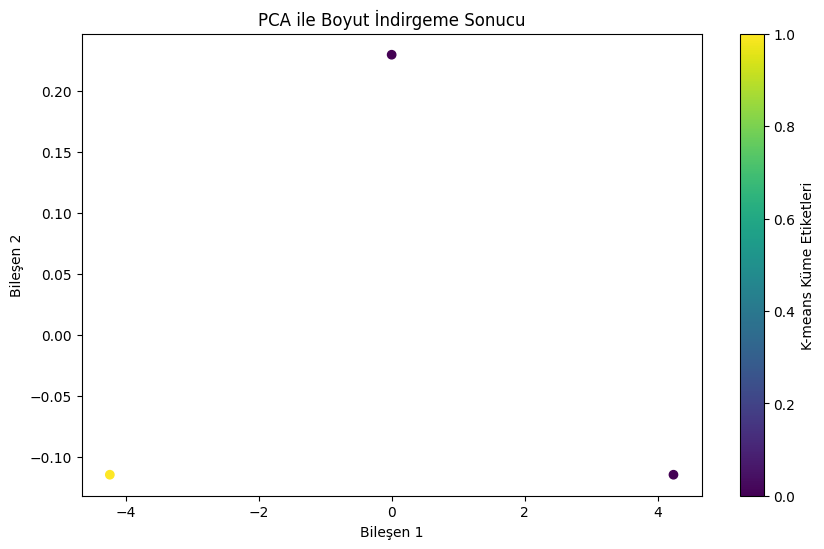


DataFrame'in Son Hali:
   Motor_Ağırlığı  Yakıt_Hücresi_Ağırlığı  Şasi_Ağırlığı  \
0              75                      85            120   
1              85                      90            130   
2              65                      80            110   

   Hidrojen_Tankı_Ağırlığı  Tekerlekler_Ağırlığı  Süspansiyon_Ağırlığı  \
0                       35                    25                    20   
1                       40                    28                    23   
2                       30                    22                    18   

   Aktarma_Organları_Ağırlığı  Diğer_Donanımlar  Sürüklenme_Katsayısı  \
0                          30                15                  0.28   
1                          35                18                  0.30   
2                          25                12                  0.25   

   Yuvarlanma_Direnci_Katsayısı  Güç_Ağırlık_Oranı  Yakıt_Verimliliği  \
0                         0.007               0.80                 18   

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# 1. Loky uyarısını devre dışı bırakalım
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Buradaki sayıyı fiziksel çekirdeklere göre ayarlayabilirsiniz

# 2. Verileri tanımlayalım (örnek veri seti)
data = {
    'Motor_Ağırlığı': [75, 85, 65],
    'Yakıt_Hücresi_Ağırlığı': [85, 90, 80],
    'Şasi_Ağırlığı': [120, 130, 110],
    'Hidrojen_Tankı_Ağırlığı': [35, 40, 30],
    'Tekerlekler_Ağırlığı': [25, 28, 22],
    'Süspansiyon_Ağırlığı': [20, 23, 18],
    'Aktarma_Organları_Ağırlığı': [30, 35, 25],
    'Diğer_Donanımlar': [15, 18, 12],
    'Sürüklenme_Katsayısı': [0.28, 0.30, 0.25],
    'Yuvarlanma_Direnci_Katsayısı': [0.007, 0.008, 0.006],
    'Güç_Ağırlık_Oranı': [0.8, 0.85, 0.75],
    'Yakıt_Verimliliği': [18, 19, 17]
}

df = pd.DataFrame(data)

# 3. Verileri normalize edelim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-Means Kümeleme Algoritması
kmeans = KMeans(n_clusters=2, random_state=42)  # random_state ile aynı sonuçları alabiliriz
kmeans_labels = kmeans.fit_predict(scaled_data)
df['K-means_Labels'] = kmeans_labels

# DBSCAN Algoritması
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps ve min_samples ayarlandı
dbscan_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Labels'] = dbscan_labels

# Sonuçları kullanıcı dostu bir şekilde yazdırma
print("Verilerin Normalizasyonu:")
print("Verilerin normalize edilmesi, farklı ölçeklerdeki verilerin aynı ölçeğe getirilmesini sağlar. Bu, analiz ve modelleme için kritik bir adımdır.\n")

print("K-Means Kümeleme Etiketleri:")
print(df[['K-means_Labels']].value_counts().reset_index(name='Counts'))
print("\nDBSCAN Kümeleme Etiketleri:")
print(df[['DBSCAN_Labels']].value_counts().reset_index(name='Counts'))

# PCA ile Boyut İndirgeme
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# PCA sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', label='K-means')
plt.title('PCA ile Boyut İndirgeme Sonucu')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.colorbar(label='K-means Küme Etiketleri')
plt.show()

# Sonuçları gösterelim
print("\nDataFrame'in Son Hali:")
print(df)



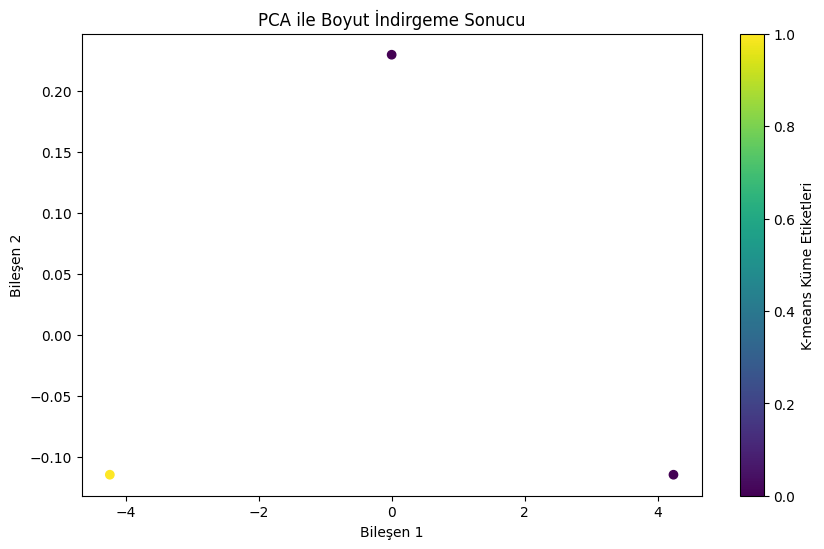


Veri Çerçevesi:
   Motor_Ağırlığı  Yakıt_Hücresi_Ağırlığı  Şasi_Ağırlığı  \
0              75                      85            120   
1              85                      90            130   
2              65                      80            110   

   Hidrojen_Tankı_Ağırlığı  Tekerlekler_Ağırlığı  Süspansiyon_Ağırlığı  \
0                       35                    25                    20   
1                       40                    28                    23   
2                       30                    22                    18   

   Aktarma_Organları_Ağırlığı  Diğer_Donanımlar  Sürüklenme_Katsayısı  \
0                          30                15                  0.28   
1                          35                18                  0.30   
2                          25                12                  0.25   

   Yuvarlanma_Direnci_Katsayısı  Güç_Ağırlık_Oranı  Yakıt_Verimliliği  \
0                         0.007               0.80                 18   
1     

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 5. PCA ile Boyut İndirgeme
pca = PCA(n_components=2)  # 2 bileşene indirgeme
pca_data = pca.fit_transform(scaled_data)

# 6. PCA sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', label='K-means')
plt.title('PCA ile Boyut İndirgeme Sonucu')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.colorbar(label='K-means Küme Etiketleri')
plt.show()

# Sonuçları gösterelim
print("\nVeri Çerçevesi:")
print(df)
print("\nPCA Sonuçları:")
print(pca_data)


In [31]:
# Sonuçları gösterelim
print("\nVeri Çerçevesi:")
print(df)

print("\nPCA Sonuçları:")
for i, (comp1, comp2) in enumerate(pca_data):
    print(f"Birey {i + 1}: Bileşen 1 = {comp1:.2f}, Bileşen 2 = {comp2:.2f}, Küme Etiketi = {kmeans_labels[i]}")



Veri Çerçevesi:
   Motor_Ağırlığı  Yakıt_Hücresi_Ağırlığı  Şasi_Ağırlığı  \
0              75                      85            120   
1              85                      90            130   
2              65                      80            110   

   Hidrojen_Tankı_Ağırlığı  Tekerlekler_Ağırlığı  Süspansiyon_Ağırlığı  \
0                       35                    25                    20   
1                       40                    28                    23   
2                       30                    22                    18   

   Aktarma_Organları_Ağırlığı  Diğer_Donanımlar  Sürüklenme_Katsayısı  \
0                          30                15                  0.28   
1                          35                18                  0.30   
2                          25                12                  0.25   

   Yuvarlanma_Direnci_Katsayısı  Güç_Ağırlık_Oranı  Yakıt_Verimliliği  \
0                         0.007               0.80                 18   
1     